# Import lib

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join('../../..')))

In [2]:
from src.etl.extract.data_extract_strategy import DataExtractor
import src.analysis.EDA.data_inspection_strategy as BaseInspector
import src.etl.transform.data_cleansing_strategy as BaseCleansing
import src.etl.transform.data_transform_strategy as BaseTransform
import src.etl.transform.data_combining_strategy as BaseCombining
import src.analysis.visualization.data_univariate_visualization_strategy as BaseViz
import src.etl.transform.data_encoding_strategy as BaseEncoder

# Import Data

In [3]:
# Define cleansing and transform strategies
cleansing_db_strategies = [
    BaseCleansing.DropColumnsCleansing(columns=[
        'id', 'source', 'author', 'imageurl', 'publishedtime', 'url',
        'language', 'createdate', 'usercreate', 'updatedate', 'userupdate', 'activedata'
    ]),
    BaseCleansing.DropDuplicateKeepFirstCleansing(),
    BaseCleansing.SpaceCleansing(columns=['titlenews', 'description']),
    BaseCleansing.ReplaceForCleansing(columns=['titlenews', 'description'], to_replace=["", " "], to_replace_with=np.nan),
    BaseCleansing.DropNaCleansing(['titlenews']),
    BaseCleansing.LowerCaseCleansing(columns=['titlenews', 'description', 'category', 'source', 'author']),
]

transform_db_strategies = [
    # BaseTransform.AstypeTransform(dtype_map={
    #     'titlenews': 'str',
    #     'description': 'str',
    #     'category': 'category'
    # }),
    BaseTransform.RenameColumnsTransform(rename_map={
        'titlenews': 'title',
        'description': 'description',
        'category': 'categories'
    }),
]

# Load, cleanse, and transform data
with DataExtractor.get_extractor(cfg={
    "type": "db",
    "conn_str": os.environ.get("Connection_String"),
    "table": "mas_news",
}) as Extractor:
    df_mas_news = Extractor.extractor()

cleansing_db = BaseCleansing.DataCleansing(cleansing_db_strategies)
transform_db = BaseTransform.DataTransform(transform_db_strategies)

df_mas_news = cleansing_db.clean(df_mas_news)
df_mas_news = transform_db.transform(df_mas_news)
df_mas_news.head()


Dropping columns: ['id', 'source', 'author', 'imageurl', 'publishedtime', 'url', 'language', 'createdate', 'usercreate', 'updatedate', 'userupdate', 'activedata']
----------------------------------------
No columns specified, dropping duplicates based on all columns.
----------------------------------------
Stripping spaces from column: titlenews
Stripping spaces from column: description
----------------------------------------
Replacing ['', ' '] with nan in column: titlenews
Replacing ['', ' '] with nan in column: description
----------------------------------------
Dropping rows with empty or NaN in '['titlenews']'
----------------------------------------
Converting values in column 'titlenews' to lowercase.
Converting values in column 'description' to lowercase.
Converting values in column 'category' to lowercase.
Column 'source' not found in DataFrame, skipping.
Column 'author' not found in DataFrame, skipping.
----------------------------------------
Renaming columns: {'titlenews

,title,description,categories
0,nba draft player survey: who's the most underr...,cooper flagg's energy and leadership are the b...,sports
1,£250million chelsea manor's owner says 'britai...,the luxury 300-year-old georgian manor belongi...,sports
2,'guardians of the galaxy' star says her oscar ...,oscar-winner zoe saldaña told people magazine ...,entertainment
3,atlanta’s growth streak has come to an end - t...,None,business
4,exempting tips from taxes could hurt employees...,lawmakers recently passed measures to exempt t...,business


In [4]:
# Define cleansing and transform strategies
cleansing_csv_strategies = [
        BaseCleansing.DropColumnsCleansing(columns=['Source','Author','Sentiment', 'URL','Published At']),
        BaseCleansing.DropDuplicateKeepFirstCleansing(),
        BaseCleansing.SpaceCleansing(columns=['Title', 'Description']),
        BaseCleansing.ReplaceForCleansing(columns=['Title', 'Description'], to_replace=[""," "], to_replace_with=np.nan),
        BaseCleansing.DropNaCleansing(['Title']),
        BaseCleansing.LowerCaseCleansing(columns=['Title', 'Description','Type','Source','Author']),
        ]
transform_csv_strategies =[
    #     BaseTransform.AstypeTransform(dtype_map={
    #     'Title': 'str',
    #     'Description': 'str',
    #     'Type':'category'
    # }),
        BaseTransform.RenameColumnsTransform(rename_map={
        'Title': 'title',
        'Description': 'description',
        'Type': 'categories'
    })
]

# Load, cleanse, and transform data
Extractor_csv = DataExtractor.get_extractor(cfg={
    "type": "csv",
    "path": os.path.join(os.path.abspath(os.path.join('../../..')), "data", "raw","source_clovis_vieira_news_sentiment_analysis", "data.csv"),
    })
df_clovis_vieira = Extractor_csv.extractor()

cleansing_csv = BaseCleansing.DataCleansing(cleansing_csv_strategies)
transform_csv = BaseTransform.DataTransform(transform_csv_strategies)

df_clovis_vieira = cleansing_csv.clean(df_clovis_vieira)
df_clovis_vieira = transform_csv.transform(df_clovis_vieira)
df_clovis_vieira.head()

Dropping columns: ['Source', 'Author', 'Sentiment', 'URL', 'Published At']
----------------------------------------
No columns specified, dropping duplicates based on all columns.
----------------------------------------
Stripping spaces from column: Title
Stripping spaces from column: Description
----------------------------------------
Replacing ['', ' '] with nan in column: Title
Replacing ['', ' '] with nan in column: Description
----------------------------------------
Dropping rows with empty or NaN in '['Title']'
----------------------------------------
Converting values in column 'Title' to lowercase.
Converting values in column 'Description' to lowercase.
Converting values in column 'Type' to lowercase.
Column 'Source' not found in DataFrame, skipping.
Column 'Author' not found in DataFrame, skipping.
----------------------------------------
Renaming columns: {'Title': 'title', 'Description': 'description', 'Type': 'categories'}
----------------------------------------


,title,description,categories
0,pine view high teacher wins best in state awar...,"st. george — kaitlyn larson, a first-year teac...",business
1,businesses face financial strain amid liquidit...,"harare, zimbabwe – local businesses are grappl...",business
2,musk donates to super pac working to elect tru...,(marketscreener.com) billionaire elon musk has...,business
3,us ftc issues warning to franchisors over unfa...,(marketscreener.com) a u.s. trade regulator on...,business
4,rooftop solar's dark side,4.5 million households in the u.s. have solar ...,business


In [5]:
# Define cleansing and transform strategies
cleansing_bbc_strategies = [
        BaseCleansing.DropColumnsCleansing(columns=['filename']),
        BaseCleansing.DropDuplicateKeepFirstCleansing(),
        BaseCleansing.SpaceCleansing(columns=['News Articles', 'Summaries']),
        BaseCleansing.ReplaceForCleansing(columns=['News Articles', 'Summaries'], to_replace=[""," "], to_replace_with=np.nan),
        BaseCleansing.DropNaCleansing(['News Articles']),
        BaseCleansing.LowerCaseCleansing(columns=['News Articles', 'Summaries']),
        ]
transform_bbc_strategies =[
    #     BaseTransform.AstypeTransform(dtype_map={
    #     'News Articles': 'str',
    #     'Summaries': 'str',
    #     'category':'category'
    # }),
        BaseTransform.RenameColumnsTransform(rename_map={
        'News Articles': 'title',
        'Summaries': 'description',
        'category': 'categories'
    }),
    ]


# Load, cleanse, and transform data
Extractor_bbc = DataExtractor.get_extractor(cfg={
    "type": "csv",
    "path": os.path.join(os.path.abspath(os.path.join('../../..')), "data","raw", "source_pariza_sharif_BBC_news_summary", "BBC News Summary","local_bbc_pariza_sharif.csv")
    })
df_pariza_sharif = Extractor_bbc.extractor()

cleansing_bbc = BaseCleansing.DataCleansing(cleansing_bbc_strategies)
transform_bbc = BaseTransform.DataTransform(transform_bbc_strategies)

df_pariza_sharif = cleansing_bbc.clean(df_pariza_sharif)
df_pariza_sharif = transform_bbc.transform(df_pariza_sharif)
df_pariza_sharif.head()

Dropping columns: ['filename']
----------------------------------------
No columns specified, dropping duplicates based on all columns.
----------------------------------------
Stripping spaces from column: News Articles
Stripping spaces from column: Summaries
----------------------------------------
Replacing ['', ' '] with nan in column: News Articles
Replacing ['', ' '] with nan in column: Summaries
----------------------------------------
Dropping rows with empty or NaN in '['News Articles']'
----------------------------------------
Converting values in column 'News Articles' to lowercase.
Converting values in column 'Summaries' to lowercase.
----------------------------------------
Renaming columns: {'News Articles': 'title', 'Summaries': 'description', 'category': 'categories'}
----------------------------------------


,categories,title,description
0,business,ad sales boost time warner profit\n\nquarterly...,timewarner said fourth quarter sales rose 2% t...
1,entertainment,gallery unveils interactive tree\n\na christma...,"the messages will be ""unwrapped"" by sculptor r..."
2,politics,labour plans maternity pay rise\n\nmaternity p...,she said her party would boost maternity pay i...
3,sport,claxton hunting first major medal\n\nbritish h...,"for the first time, claxton has only been prep..."
4,tech,ink helps drive democracy in asia\n\nthe kyrgy...,the other common type of ink in elections is i...


In [6]:
combiner = [
    BaseCombining.ConcatenateDataFramesCombining([df_clovis_vieira, df_pariza_sharif])
]
combined = BaseCombining.DataCombining(combiner)
df = combined.combine(df_mas_news)
df.head()
df.shape

Concatenating 2 DataFrames...
Done. DataFrames have been concatenated.
----------------------------------------


(7808, 3)

In [7]:
cleansing_df_strategies = [
        BaseCleansing.DropDuplicateKeepFirstCleansing(),
    ]
transform_df_strategies = [
    BaseTransform.ReplaceValuesTransform(column='categories',replace_map={
        'sports': 'sport', 
        'technology': 'tech'
    })
    ]

clean_df = BaseCleansing.DataCleansing(cleansing_df_strategies)
transform_df = BaseTransform.DataTransform(transform_df_strategies)
df = clean_df.clean(df)
df = transform_df.transform(df)


No columns specified, dropping duplicates based on all columns.
----------------------------------------
Replacing values in column 'categories' with {'sports': 'sport', 'technology': 'tech'} ...
----------------------------------------


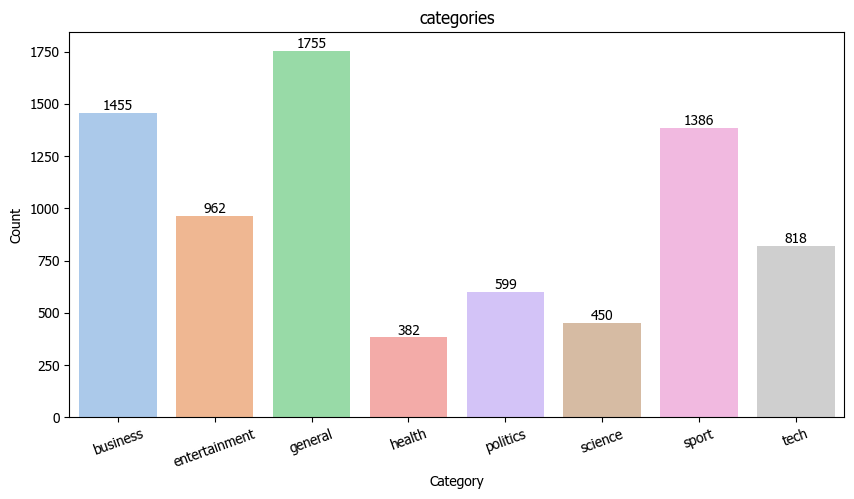

----------------------------------------


In [8]:
strategies_viz = [
    BaseViz.BarplotUniViz(
        sns_kwargs={"palette": "pastel", "hue": "category", "legend": False},
        plt_kwargs={"figsize": (10, 5), "title": 'categories', "rotation": 20, "fontsize":10}
        )
]
viz = BaseViz.UniVisualizer(strategies_viz)
viz.visualize(df,'categories')

In [9]:
# mapping = {'business': 0, 'entertainment': 1, 'general': 2, 'health': 3, 'politics': 4, 'science': 5, 'sport': 6, 'tech': 7}
# strategies_encoder = [
#     BaseEncoder.CustomMapEncoder(columns=['categories'], mapping=mapping)
#     ]
# strategies_transform = [
#     BaseTransform.AstypeTransform(dtype_map={
#         'title': 'string',
#         'description': 'string',
#         'categories': 'category',
#         'mapped_categories': 'int64'
#     })

# ]
# encoder = BaseEncoder.DataEncoder(strategies_encoder )
# transform= BaseTransform.DataTransform(strategies_transform)
# df = encoder.encode(df)
# df = transform.transform(df)

In [10]:
strategies_inspention_v1 = [
    BaseInspector.ShapeInspection(),
    BaseInspector.DtypeInspection(),
    BaseInspector.NullInspection(),
    BaseInspector.DuplicatesInspection(),
    BaseInspector.ValueCountsInspection(columns=['categories'])
]
inspector = BaseInspector.DataInspector(strategies_inspention_v1)
inspector.inspect(df)

Shape: (7807, 3)
----------------------------------------
Data Types:
title          object
description    object
categories     object
dtype: object
----------------------------------------
Missing Values per column:
title           0
description    87
categories      0
dtype: int64
----------------------------------------
Duplicated Rows: 0
----------------------------------------
Value Counts for 'categories':
categories
health            382
science           450
politics          599
tech              818
entertainment     962
sport            1386
business         1455
general          1755
Name: count, dtype: int64
----------------------------------------


In [11]:
strategies_inspention_v2 = [
    #BaseInspector.DescribeInspection(), 
    BaseInspector.InfoInspection()
]
inspector.set_strategies(strategies_inspention_v2)
inspector.inspect(df)

summary of non-missing values and data types:
<class 'pandas.core.frame.DataFrame'>
Index: 7807 entries, 0 to 7807
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7807 non-null   object
 1   description  7720 non-null   object
 2   categories   7807 non-null   object
dtypes: object(3)
memory usage: 244.0+ KB
None
----------------------------------------


In [12]:
import datetime
da = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
full_path = os.path.join(
    os.path.abspath(os.path.join('../../..')),
    "data",
    "interim",
    "data_news_segmentation",
    "description_null",
    f"newsseg_desc_null_v{da}.csv"
)
df.to_csv(full_path, index=False)
print(f"Data saved to {full_path}")

Data saved to c:\Users\Lenovo\Desktop\AI-News-Project\data\interim\data_news_segmentation\description_null\newsseg_desc_null_v20250912_151350.csv
